In [2]:
import pandas as pd
import numpy as np
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

# read data

In [5]:
data = pd.read_csv('customers.csv')
dat = ff.create_table(data.head())
py.iplot(dat)

# describe data

In [6]:
desc = ff.create_table(data.describe())
py.iplot(desc)

# checking null values in the dataset

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

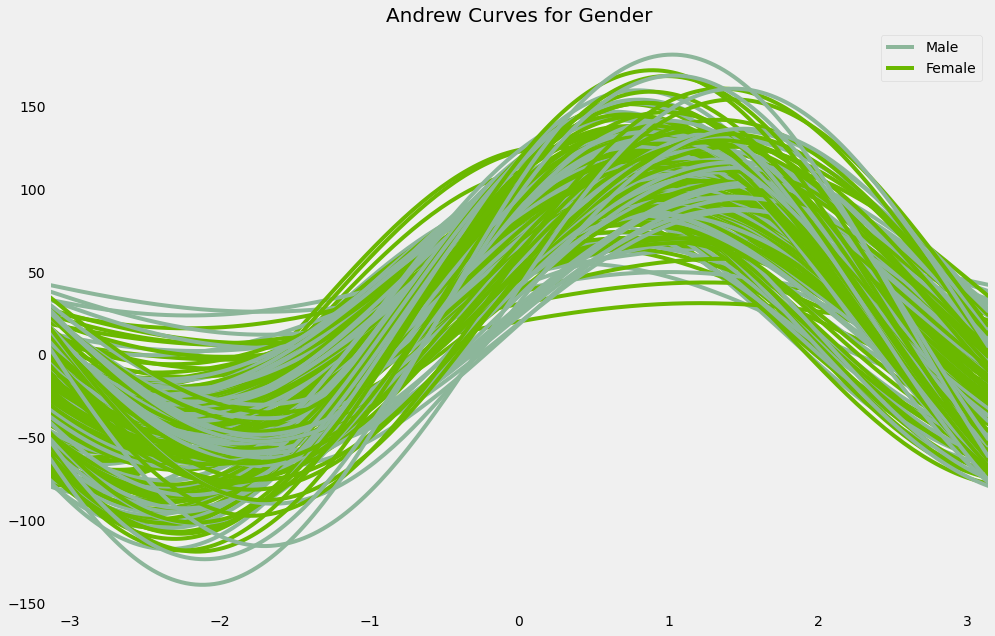

In [8]:
plt.rcParams['figure.figsize'] = (15, 10)

plotting.andrews_curves(data.drop(columns=['CustomerID']), "Gender")
plt.title("Andrew Curves for Gender", fontsize=20)
plt.show()

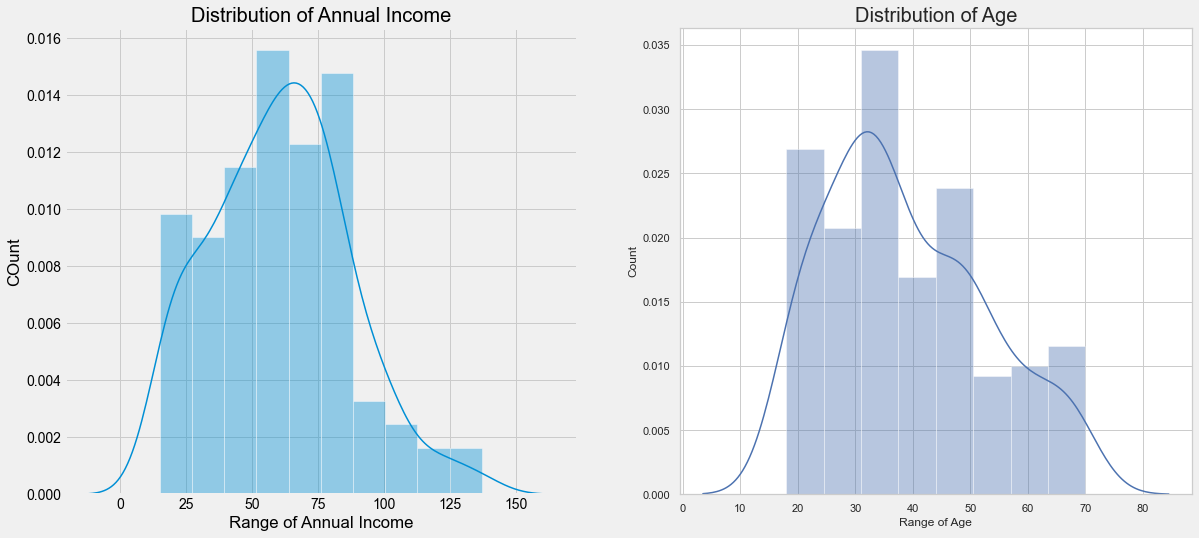

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('COunt')

plt.subplot(1, 2, 2)
sns.set(style='whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [10]:
data.drop(columns=['CustomerID']).corr()['Spending Score (1-100)'].sort_values(ascending=False)

Spending Score (1-100)    1.000000
Annual Income (k$)        0.009903
Age                      -0.327227
Name: Spending Score (1-100), dtype: float64

# Clustering Analysis

In [11]:
print(f"clustering of {', '.join(list(data.iloc[:, [3, 4]].columns))}")

clustering of Annual Income (k$), Spending Score (1-100)


In [12]:
x = data.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


# Find the best K using elbow method and silhoutte score

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

for k cluster: 2, silhoutte score is: 0.2968969162503008
for k cluster: 3, silhoutte score is: 0.46761358158775435
for k cluster: 4, silhoutte score is: 0.4931963109249047
for k cluster: 5, silhoutte score is: 0.553931997444648
for k cluster: 6, silhoutte score is: 0.5393922132561455
for k cluster: 7, silhoutte score is: 0.5270287298101395
for k cluster: 8, silhoutte score is: 0.4575689106804838
for k cluster: 9, silhoutte score is: 0.4565077334305076
for k cluster: 10, silhoutte score is: 0.449795408266166


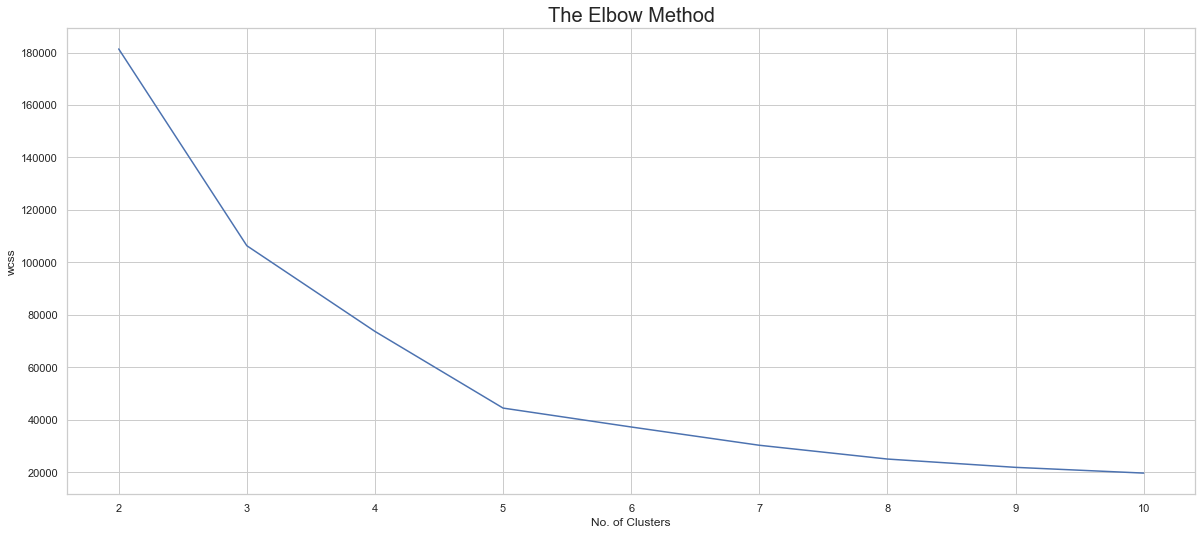

In [14]:
wcss = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    cluster_labels = km.fit_predict(x)
    silhoutte_avg = silhouette_score(x, cluster_labels)
    print(f"for k cluster: {i}, silhoutte score is: {silhoutte_avg}")

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

by looking at the above silhoutte score and elbow method plot, the optimum number of cluster is 5 

# Visualizing the cluster

In [15]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

In [16]:
y_means.shape

(200,)

y_means is cluster labels

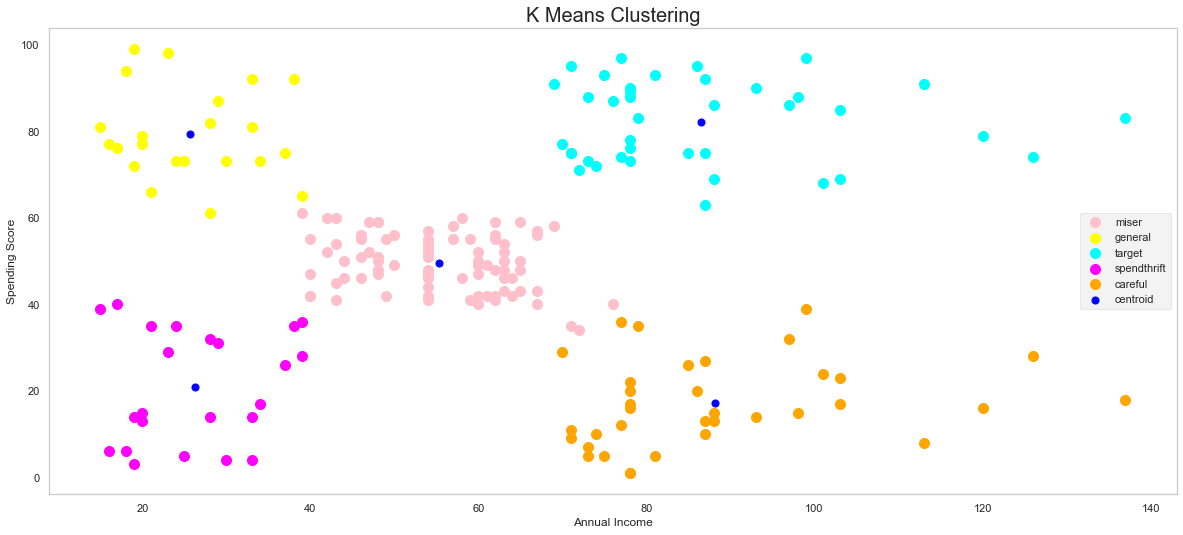

In [17]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='pink', label='miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='cyan', label='target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c='magenta', label='spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c='orange', label='careful')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='centroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

clustering based on their ages

In [18]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

for k cluster: 2, silhoutte score is: 0.4692341232501655
for k cluster: 3, silhoutte score is: 0.45300127016521263
for k cluster: 4, silhoutte score is: 0.49973941540141753
for k cluster: 5, silhoutte score is: 0.4363508054543454
for k cluster: 6, silhoutte score is: 0.4405479018621985
for k cluster: 7, silhoutte score is: 0.4212938931368575
for k cluster: 8, silhoutte score is: 0.43310368987685466
for k cluster: 9, silhoutte score is: 0.41189279793283423
for k cluster: 10, silhoutte score is: 0.4082265556783057


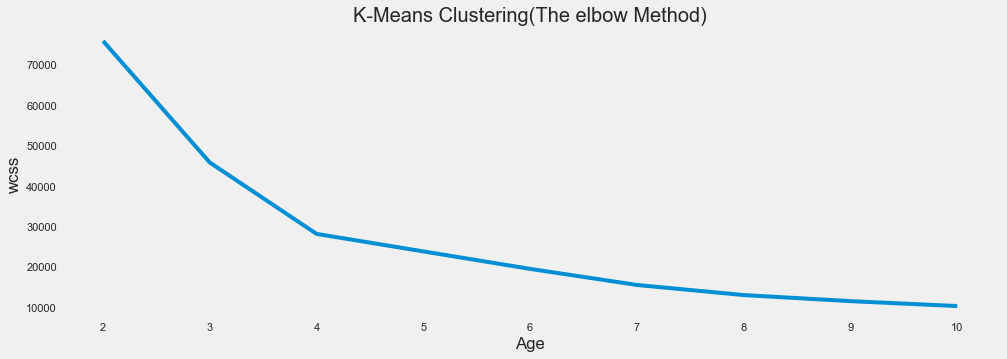

In [19]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.fit_predict(x)
    silhoutte_avg = silhouette_score(x, cluster_labels)
    print(f"for k cluster: {i}, silhoutte score is: {silhoutte_avg}")

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(2, 11), wcss)
plt.title('K-Means Clustering(The elbow Method)', fontsize=20)
plt.xlabel('Age')
plt.ylabel('wcss')
plt.grid()
plt.show()

according to the silhoutte score and elbow plot at the above, the best k is 4.

# Visualizing the cluster

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = kmeans.fit_predict(x)

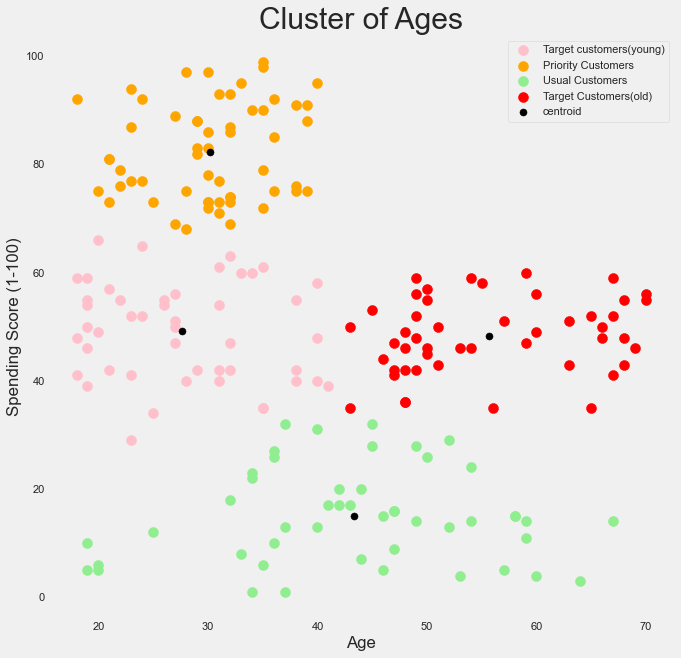

In [21]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize=30)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='pink', label='Target customers(young)')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='orange', label='Priority Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='lightgreen', label='Usual Customers')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c='red', label='Target Customers(old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='black', label='centroid')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()
encoder.fit(data['Gender'])

LabelEncoder()

In [24]:
data['gender_encoded'] = encoder.transform(data['Gender'])

In [25]:
x_data = data[['gender_encoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [26]:
x_data[['gender_encoded', 'Spending Score (1-100)']].corr('spearman')['Spending Score (1-100)']

gender_encoded           -0.040222
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64

In [27]:
x_data_val = x_data.values

for k cluster: 2, silhoutte score is: 0.29307334005502633
for k cluster: 3, silhoutte score is: 0.383798873822341
for k cluster: 4, silhoutte score is: 0.4052954330641215
for k cluster: 5, silhoutte score is: 0.4440669204743008
for k cluster: 6, silhoutte score is: 0.45205475380756527
for k cluster: 7, silhoutte score is: 0.44096462877395787
for k cluster: 8, silhoutte score is: 0.39933527263587537
for k cluster: 9, silhoutte score is: 0.39791128547609517
for k cluster: 10, silhoutte score is: 0.3875891803538735


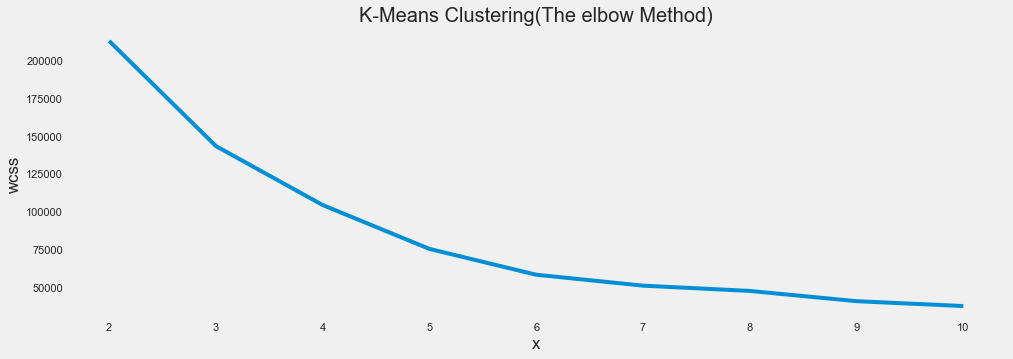

In [28]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_data_val)
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.fit_predict(x_data_val)
    silhoutte_avg = silhouette_score(x_data_val, cluster_labels)
    print(f"for k cluster: {i}, silhoutte score is: {silhoutte_avg}")
    
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(2, 11), wcss)
plt.title('K-Means Clustering(The elbow Method)', fontsize=20)
plt.xlabel('x')
plt.ylabel('wcss')
plt.grid()
plt.show()

In [29]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(x_data_val)

In [30]:
x_data['cluster'] = cluster_labels

In [31]:
data['cluster'] = cluster_labels

In [32]:
x_data.columns

Index(['gender_encoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')

In [33]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [34]:
result = {}
for i in cols:
#     if i != 'Gender':
#         print(data.groupby(['cluster'])[i].mean())
#     else:
#         print(data.groupby(['cluster'])[i].value_counts())
    result[i] = data.groupby(['cluster'])[i].mean().tolist()

In [35]:
result_df = pd.DataFrame(result)

In [36]:
result_df = result_df.reset_index().rename(columns={'index': 'cluster'})

In [37]:
result_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,41.685714,88.228571,17.285714
1,1,32.692308,86.538462,82.128205
2,2,27.000000,56.657895,49.131579
3,3,56.155556,53.377778,49.088889
4,4,25.272727,25.727273,79.363636
5,5,44.142857,25.142857,19.523810


# Visualizing multi-dimensional data cluster using bar plot

In [38]:
tidy_df = result_df.melt(id_vars='cluster')

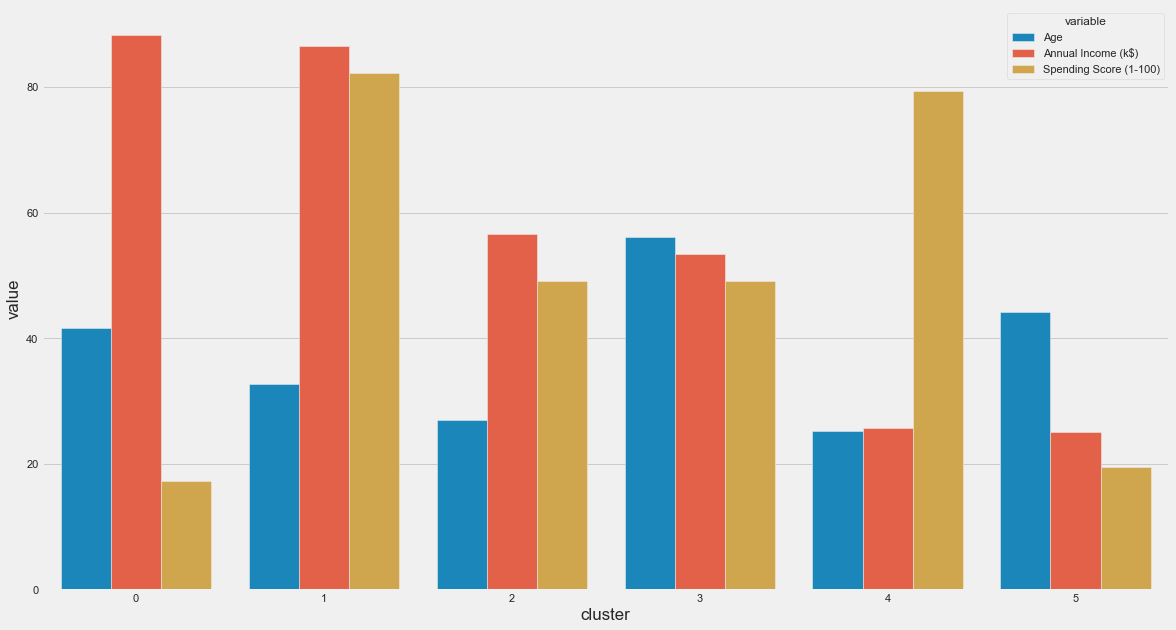

In [39]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.barplot(x='cluster', y='value', hue='variable', data=tidy_df)
plt.show()